# What are the most demamded skills for Machine learning And Cloud Engineer and Software Engineer

### Steps to follow
1. Clean up the skill column
2. Calculate the skill count based on job_title_short
3. Calculate skill percentage
4. Plot the final findings.


In [2]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset
df = pd.read_csv('C:/Users/HP/jupyter lab csvs/data_jobs.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter the data for the market of the United states

In [5]:
df_us = df[df['job_country'] == 'United States'].copy()
df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,NaN,NaN,NaN,JPMorgan Chase & Co.,NaN,NaN
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN


### Explode the Skills

In [6]:
df_skills = df_us.explode(['job_skills'])
df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,NaN
785705,Data Analyst,sql
785705,Data Analyst,python


### Count the Skills per Job Title

In [16]:
# Group by the job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


### First we create the list of specific roles we want

##### Focus: Machine Learnng Engineers, Cloud Engineers, and Software Engineers


In [8]:
# Define the desired job titles
desired_job_titles = ['Cloud Engineer', 'Software Engineer', 'Machine Learning Engineer']

# Filter the unique job titles from the DataFrame and convert them to a list
job_titles = df_skills_count['job_title_short'].unique().tolist()

# Filter the job titles to get only the desired ones
filtered_job_titles = [title for title in job_titles if title in desired_job_titles]

# Sort the filtered job titles (optional, depending on your needs)
filtered_job_titles = sorted(filtered_job_titles)

filtered_job_titles


['Cloud Engineer', 'Machine Learning Engineer', 'Software Engineer']

### Plot our the skills count

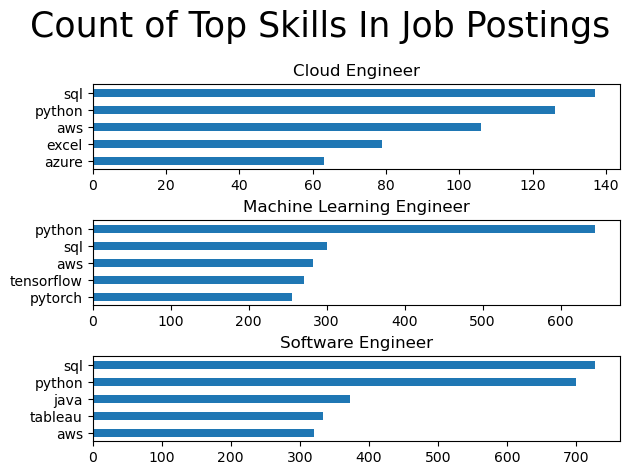

In [9]:
fig, ax = plt.subplots(len(filtered_job_titles), 1)
for i, job_title in enumerate(filtered_job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle(' Count of Top Skills In Job Postings', fontsize=25)
fig.tight_layout(h_pad = 0.5)
plt.show()

#### Convert Counts to Percentages
##### Focus: Counts don't show what portions of jobs are requesting these skills

So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset.

Before we can calculate the percentages we need the total counts for the jobs posted by job title. Calculate the frequency of each job title using the value_counts() method on the job_title_short column. Then reset the index to transform the Series into a DataFrame and renames the columns to job_title_short and total. The DataFrame df_job_title_count now holds a list of job titles alongside their total occurrences.

In [10]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423




To calculate the skill percentages within each job title, i took the following steps:

1. **Merge DataFrames**: 
   Merge `df_skills_count` with `df_job_title_count` using the `'job_title_short'` column. This ensures that each skill's count is paired with the total number of job postings for that specific job title.

2. **Calculate Percentages**:
   For each skill, calculate its percentage share of job postings within its job title. This is done by dividing the skill count by the total job postings for that title and multiplying by 100. Add this new calculation as a `'percentage'` column to the DataFrame.

In [12]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 *  df_skills_perc['skill_count'] / df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


### Plot Percentage Count

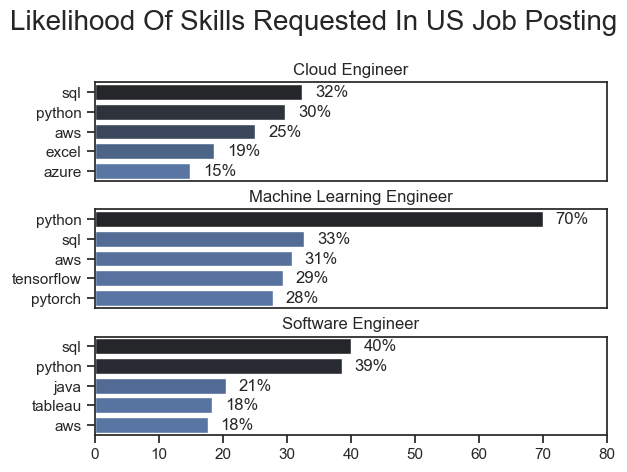

In [15]:
# Create subplots with a separate plot for each job title in filtered_job_titles
fig, ax = plt.subplots(len(filtered_job_titles), 1)

sns.set_theme(style='ticks')

# Loop through each job title to create individual bar plots
for i, job_title in enumerate(filtered_job_titles):
    # Filter the DataFrame for the top 5 skills of the current job title
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    

    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    
    # Set subplot title to the current job title and remove unnecessary labels
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()  # Remove legend to reduce clutter
    ax[i].set_xlim(0, 80)    # Set x-axis limit to 80% for consistency

    # Annotate each bar with the skill percentage
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 2, n, f'{v:.0f}%', va='center')

    # Hide x-axis ticks for all but the last subplot to save space
    if i != len(filtered_job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Likelihood Of Skills Requested In US Job Posting', fontsize=20)

# Adjust layout to prevent overlap between subplots
fig.tight_layout(h_pad=0.5)
plt.show()
